## 7.3 Métodos de Série de Taylor

Consideremos o Problema de Valor Inicial (PVI) descrito por
$$\begin{cases} 
   y' = f(x,y) \\
   y(x_0)=y_0
  \end{cases}$$


Supondo que a solução $y(x)$ do PVI possui todas as derivadas contínuas no intervalo $[a,b]$ que contém os pontos de discretização $x_0$,$x_1$,...,$x_n$ , o desenvolvimento em série de Taylor da função $y(x)$ em torno do ponto $x_n$ é dado por

$$ y(x) = y(x_n) + y'(x_n)(x−x_n) + y''(x_n)\frac{(x-x_n)^2}{2!}+...+y^{(p)}(x_n)\frac{(x-x_n)^p}{p!}+y^{(p+1)}(\xi)\frac{(x-\xi)^{p+1}}{(p+1)!}$$

com $ x_0<\xi<x$. 

Tomando $x = x_n + h$, denotado por $x_n+1$ , assim, $h = x_n+1 − x_n$ e temos:

$$ y(x) = y(x_n) + y'(x_n)h + y''(x_n)\frac{h^2}{2!}+...+y^{(p)}(x_n)\frac{h^p}{p!}+y^{(p+1)}(\xi)\frac{(x-\xi)^{p+1}}{(p+1)!}$$

Se truncarmos a série de Taylor no p-ésimo termo, temos:

$$ y(x) = y(x_n) + y'(x_n)h + y''(x_n)\frac{h^2}{2!}+...+y^{(p)}(x_n)\frac{h^p}{p!}$$

com um **erro de truncamento** dado pelo último termo da série de Taylor

$$e(x_n)=y^{(p+1)}(\xi)\frac{(x-\xi)^{p+1}}{(p+1)!}$$


Se a função $y(x)$ possui a derivada de ordem $(p + 1)$ contínua no intervalo $[a,b]$, então existe $M = max \left\{ \left|y^{(p+1)}(x)\right|, x \in [a,b] \right\}$, e temos uma estimativa para o erro dada por um limitante superior, de ordem $(p + 1)$, como segue:

$$ |E| \leq \frac{h^{p+1}}{(p+1)!}M$$

Assim, usando a série de Taylor, podemos calcular aproximações para $y(x)$ da seguinte forma:

$$ y(x_{n+1}) = y_n + y'_nh + y''_n\frac{h^2}{2!}+...+y^{(p)}_n\frac{h^p}{p!}$$

onde 

$ y'_n = f(x_n, y_n)$

$ y''_n = f_x(x_n, y_n) + f_y(x_n, y_n)y'_n$

$y'''_n = f_{xx}(x_n, y_n) + 2f_{xy}(x_n, y_n)f(x_n, y_n) + f^2(x_n, y_n)f_{yy}(x_n, y_n) + f^2_y(x_n, y_n)f(x_n, y_n)$

$\vdots $


### Método de Taylor de ordem $p=2$
### Exemplo
Use o método de Taylor de ordem 2 para integrar numericamente a equação:

$$ \begin {cases}
   \frac{dy}{dx} = x-y+2 \\
    y(0)=2
    \end{cases}$$

de $x = 0$ a $x = 1$ com $N = 5$ subintervalos. Compare os valores e plote o resultado considerando a solução exata $y(x)=e^x - x + 1$.

*Solução:*

Precisamos usar a fórmula de recorrência

$$ y_{n+1} = y_n + y'_nh + y''_n\frac{h^2}{2!} $$

em que

$$ y' = x - y + 2 $$

$$ y'' = 1-y' = 1-(x-y+2) = -x+y-1$$

então

$$ y_{n+1} = y_n + (x_n - y_n + 2)h + (-x_n+y_n-1) \frac{h^2}{2!} $$

Y 1 = 2.02
Y 2 = 2.0724
Y 3 = 2.1513679999999997
Y 4 = 2.2521217599999996
Y 5 = 2.3707398431999995
[0.  0.2 0.4 0.6 0.8 1. ]
Sol. aprox.: [2.     2.02   2.0724 2.1514 2.2521 2.3707]
Sol. exata.: [2.     2.0187 2.0703 2.1488 2.2493 2.3679]


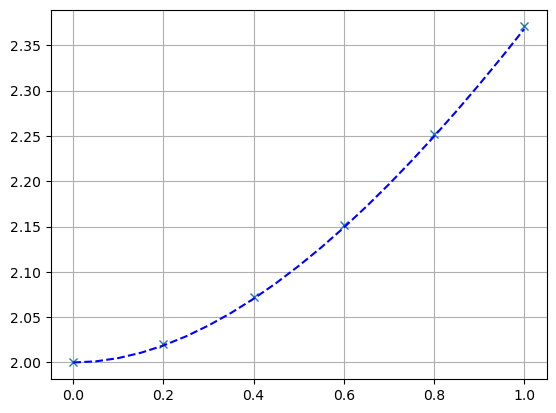

In [1]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x,y: x-y+2
df = lambda x,y: -x+y-1

x0 = 0
xn = 1
n = 5 #subintervalos

X = np.linspace(x0,xn,n+1)
Y = np.zeros(n+1)
Y[0] = 2
h=(xn-x0)/n
for i in range(n):
    Y[i+1] = Y[i] + h*f(X[i],Y[i]) + 0.5*(h**2)*df(X[i],Y[i])
    print ("Y",i+1,"=",Y[i+1])
print (X)
print ('Sol. aprox.:',np.round(Y,4))
print ('Sol. exata.:',np.round(np.exp(-X) + X + 1, 4))

Xe = np.linspace(X[0],X[-1],21)
Ye = np.exp(-Xe) + Xe + 1


# plotando
plt.plot(X, Y, "x",Xe, Ye, 'b--')
plt.grid()
plt.show()